In [1]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open("fcnh4ty49i791.png").convert("L")
transform = T.ToTensor()
img_tensor = transform(img).unsqueeze(0)

In [3]:
# Define Sobel filters (horizontal and vertical)
sobel_x = torch.tensor([[-1., 0., 1.],
                        [-2., 0., 2.],
                        [-1., 0., 1.]]).view(1, 1, 3, 3)
sobel_y = torch.tensor([[-1., -2., -1.],
                        [ 0.,  0.,  0.],
                        [ 1.,  2.,  1.]]).view(1, 1, 3, 3)

In [4]:
edge_x = torch.nn.functional.conv2d(img_tensor, sobel_x, padding=1)
edge_y = torch.nn.functional.conv2d(img_tensor, sobel_y, padding=1)

In [5]:
edges = torch.sqrt(edge_x ** 2 + edge_y ** 2)

(np.float64(-0.5), np.float64(1186.5), np.float64(2024.5), np.float64(-0.5))

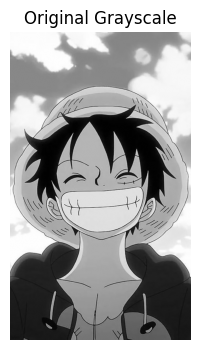

In [6]:
# Visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Grayscale")
plt.imshow(img, cmap="gray")
plt.axis("off")

(np.float64(-0.5), np.float64(1186.5), np.float64(2024.5), np.float64(-0.5))

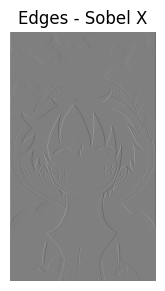

In [7]:
plt.subplot(1, 3, 2)
plt.title("Edges - Sobel X")
plt.imshow(edge_x.squeeze().detach(), cmap="gray")
plt.axis("off")

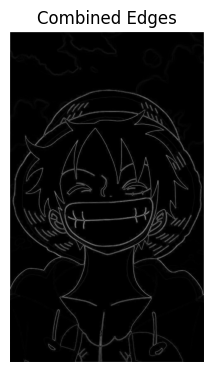

In [8]:
plt.subplot(1, 3, 3)
plt.title("Combined Edges")
plt.imshow(edges.squeeze().detach(), cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()
